In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go

In [14]:
HUNT_PRICE = pd.read_csv('HUNT/price.csv')
HUNT_TVL = pd.read_csv('HUNT/TVL.csv')
HUNT_PRICE['market_cap'] = HUNT_PRICE['huntprice'] * HUNT_TVL['0']

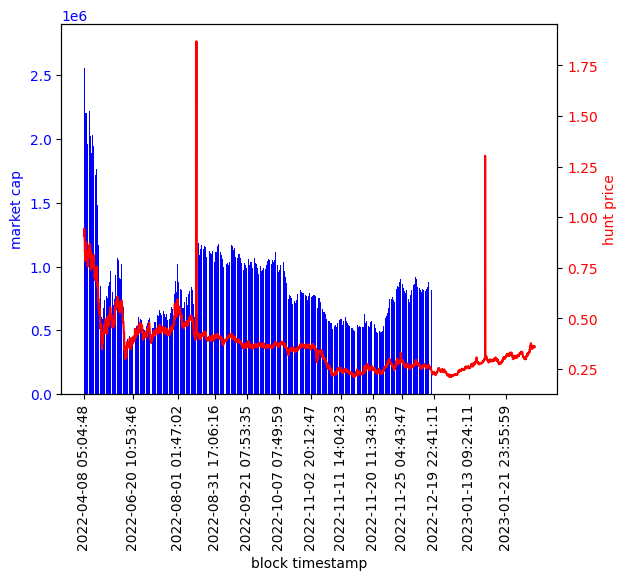

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

ax1.bar(HUNT_PRICE['block_timestamp'], HUNT_PRICE['market_cap'], color='b')
ax1.set_xlabel('block timestamp')
ax1.set_ylabel('market cap', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(HUNT_PRICE['block_timestamp'][::500], rotation=90)


ax2 = ax1.twinx()

ax2.plot(HUNT_PRICE['block_timestamp'], HUNT_PRICE['huntprice'], color='r')
ax2.set_ylabel('hunt price', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.show()


In [16]:
MARKET_CAP = HUNT_PRICE.loc[:, ['block_timestamp', 'market_cap']]

HUNT_PRICE['block_timestamp'] = pd.to_datetime(HUNT_PRICE['block_timestamp'])
MARKET_CAP['block_timestamp'] = pd.to_datetime(MARKET_CAP['block_timestamp'])


HUNT_PRICE.set_index('block_timestamp', inplace=True)
HUNT_PRICE = HUNT_PRICE["huntprice"].resample("D").ohlc()

In [17]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Candlestick(x=HUNT_PRICE.index,
                open=HUNT_PRICE['open']/0.997,
                high=HUNT_PRICE['high']/0.997,
                low=HUNT_PRICE['low']/0.997,
                close=HUNT_PRICE['close']/0.997)])

# fig.add_trace(go.Bar(x=MARKET_CAP['block_timestamp'], y=MARKET_CAP['market_cap'], opacity=0.5, yaxis="y3"))

# fig.update_layout(
#     title='HUNT Price and Market Cap',
#     yaxis_title='HUNT Price'
# )



fig.show()

In [18]:
line = go.Scatter(x=HUNT_PRICE['block_timestamp'], y=HUNT_PRICE['huntprice'], mode='lines')
fig = go.Figure(line)

fig.show()